In [30]:
#import necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [31]:
#upload data 
jobs_in_data = pd.read_csv('/Users/melvinlewis/Desktop/Projectdata/Capstone/jobs_in_data.csv')

#beginning EDA
print("\njobs_in_data Data:")
print(jobs_in_data)

print("\njobs_in_data types:")
print(jobs_in_data.dtypes)


jobs_in_data Data:
      work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_re

In [32]:
print("_______jobs_in_datanullvalues_______")
print(jobs_in_data.isnull().sum())

_______jobs_in_datanullvalues_______
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [33]:
print(jobs_in_data.columns)

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [34]:
print(jobs_in_data['job_title'])

0           Data DevOps Engineer
1                 Data Architect
2                 Data Architect
3                 Data Scientist
4                 Data Scientist
                  ...           
9350             Data Specialist
9351              Data Scientist
9352    Principal Data Scientist
9353              Data Scientist
9354       Business Data Analyst
Name: job_title, Length: 9355, dtype: object


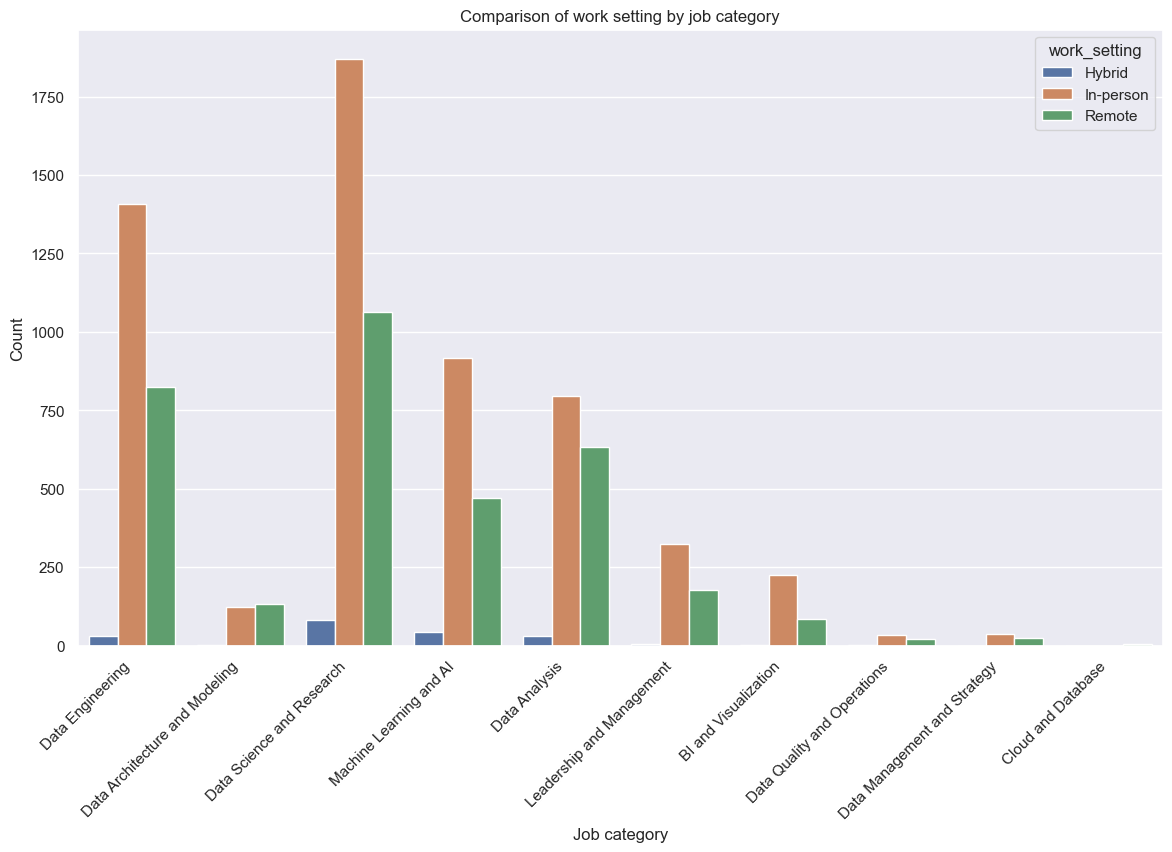

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.countplot(x='job_category', hue='work_setting', data=jobs_in_data)
plt.title('Comparison of work setting by job category')
plt.xlabel('Job category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()


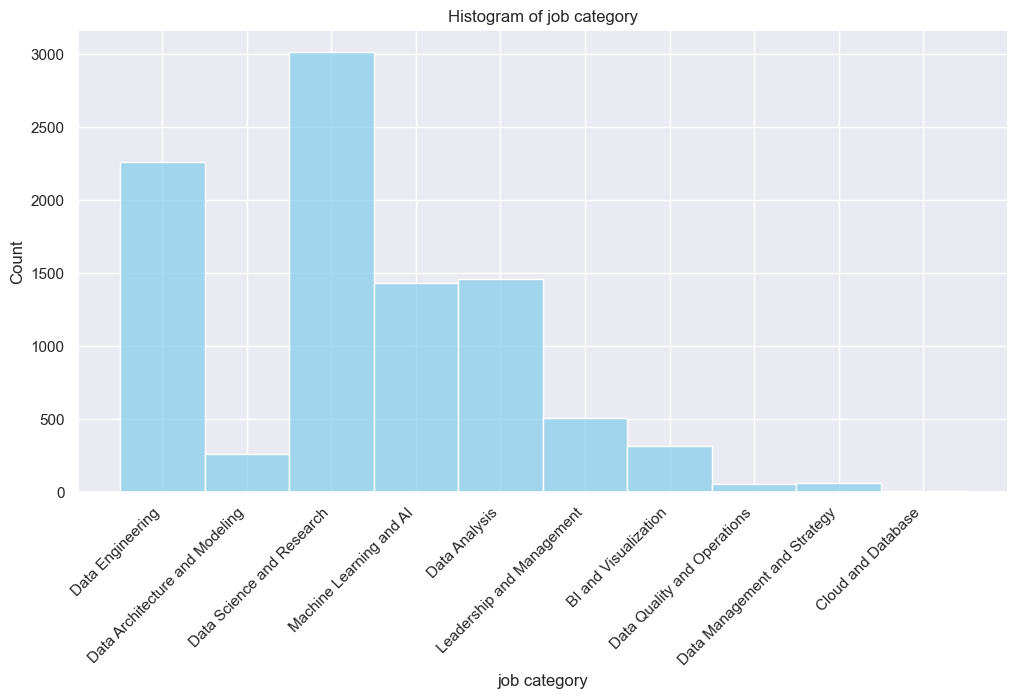

In [36]:
#Create a histogram for 'job_category'
plt.figure(figsize=(12, 6))
sns.histplot(jobs_in_data['job_category'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of job category')
plt.xlabel('job category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


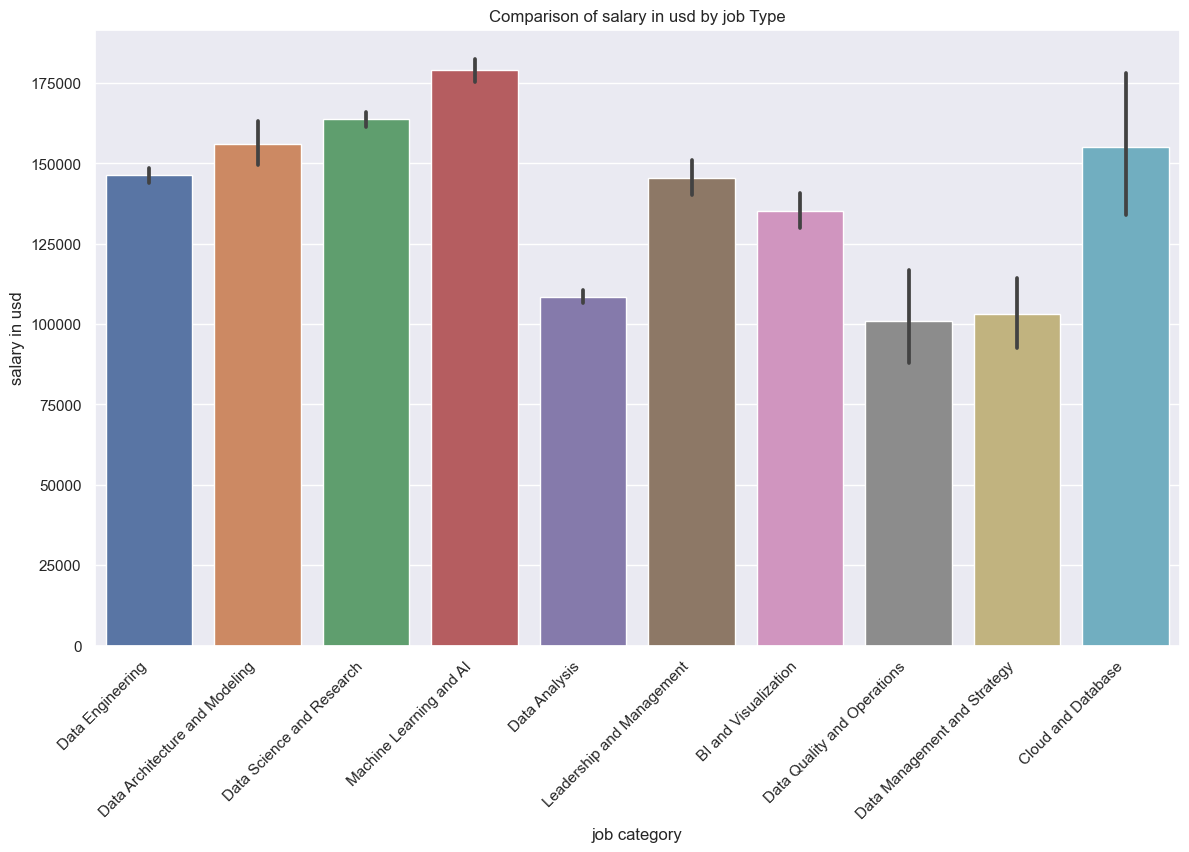

In [37]:
#Create a bar plot for salary_in_usd & job_category
plt.figure(figsize=(14, 8))
sns.barplot(x='job_category', y='salary_in_usd', data=jobs_in_data)
plt.title('Comparison of salary in usd by job Type')
plt.xlabel('job category')
plt.ylabel('salary in usd')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


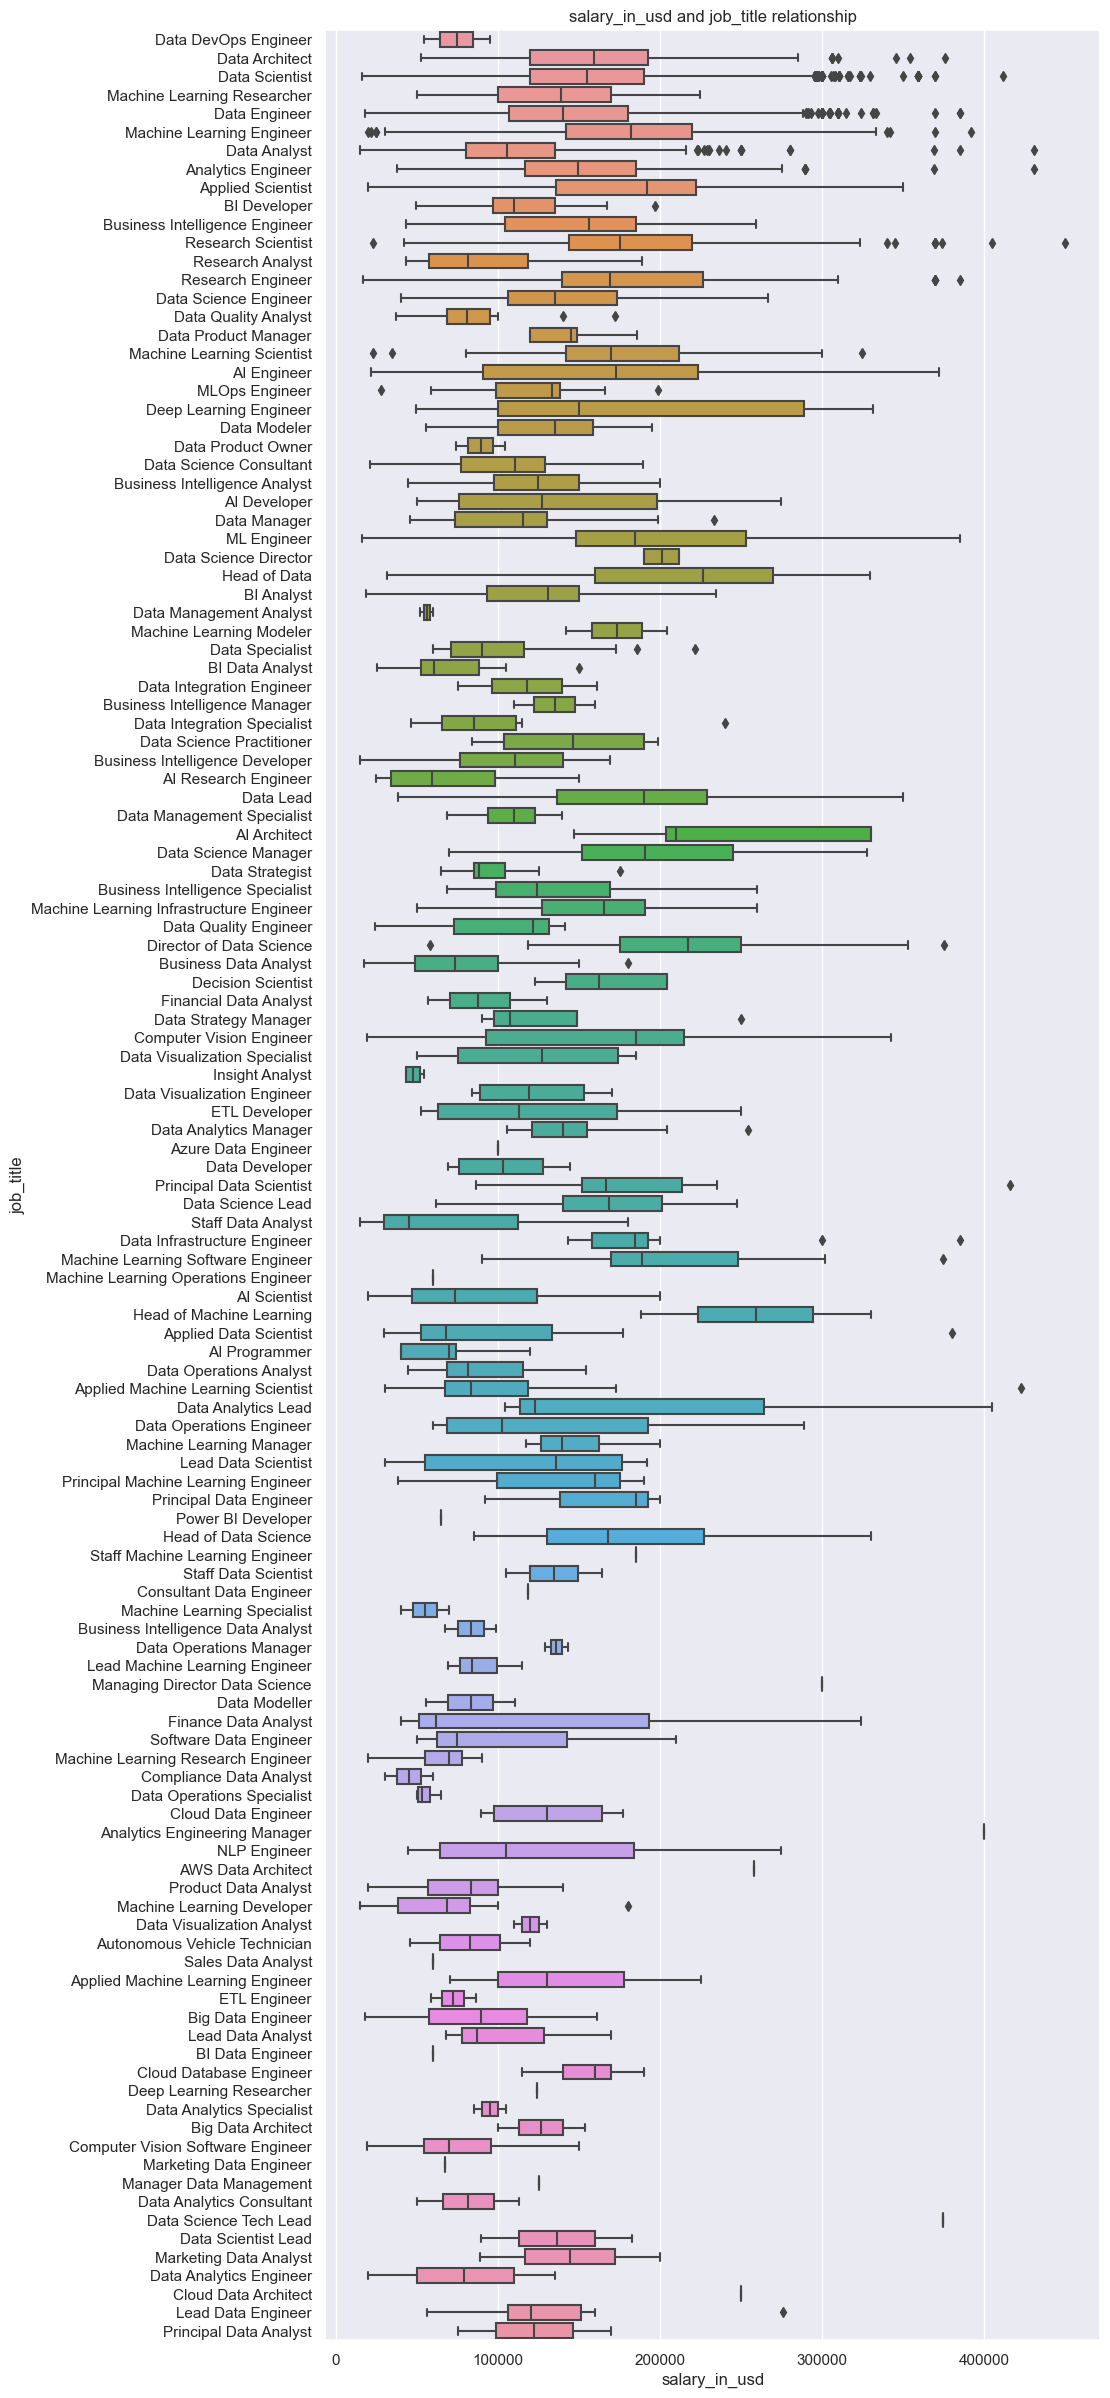

In [38]:
sns.set(rc={'figure.figsize':(10,30)})

for col in list(['job_title']):
    sns.boxplot(data=jobs_in_data, y=col, x='salary_in_usd').set_title(f'salary_in_usd and {col} relationship')
    plt.show()

In [39]:
unique_job_titles = jobs_in_data['job_title'].unique()
print("Unique job titles:")
print(unique_job_titles)

Unique job titles:
['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research Engineer' 'Data Lead' 'Data Management Specialist'
 'AI Architect' 'Data

In [40]:
# Define a mapping from job title to numerical value
job_title_numeric = {
    'Data DevOps Engineer': 1,
    'Data Architect': 2,
    'Data Scientist': 3,
    'Machine Learning Researcher': 4,
    'Data Engineer': 5,
    'Machine Learning Engineer': 6,
    'Data Analyst': 7,
    'Analytics Engineer': 8,
    'Applied Scientist': 9,
    'BI Developer': 10,
    'Business Intelligence Engineer': 11,
    'Research Scientist': 12,
    'Research Analyst': 13,
    'Research Engineer': 14,
    'Data Science Engineer': 15,
    'Data Quality Analyst': 16,
    'Data Product Manager': 17,
    'Machine Learning Scientist': 18,
    'AI Engineer': 19,
    'MLOps Engineer': 20,
    'Deep Learning Engineer': 21,
    'Data Modeler': 22,
    'Data Product Owner': 23,
    'Data Science Consultant': 24,
    'Business Intelligence Analyst': 25,
    'AI Developer': 26,
    'Data Manager': 27,
    'ML Engineer': 28,
    'Data Science Director': 29,
    'Head of Data': 30,
    'BI Analyst': 31,
    'Data Management Analyst': 32,
    'Machine Learning Modeler': 33,
    'Data Specialist': 34,
    'BI Data Analyst': 35,
    'Data Integration Engineer': 36,
    'Business Intelligence Manager': 37,
    'Data Integration Specialist': 38,
    'Data Science Practitioner': 39,
    'Business Intelligence Developer': 40,
    'AI Research Engineer': 41,
    'Data Lead': 42,
    'Data Management Specialist': 43,
    'AI Architect': 44,
    'Data Science Manager': 45,
    'Data Strategist': 46,
    'Business Intelligence Specialist': 47,
    'Machine Learning Infrastructure Engineer': 48,
    'Data Quality Engineer': 49,
    'Director of Data Science': 50,
    'Business Data Analyst': 51,
    'Decision Scientist': 52,
    'Financial Data Analyst': 53,
    'Data Strategy Manager': 54,
    'Computer Vision Engineer': 55,
    'Data Visualization Specialist': 56,
    'Insight Analyst': 57,
    'Data Visualization Engineer': 58,
    'ETL Developer': 59,
    'Data Analytics Manager': 60,
    'Azure Data Engineer': 61,
    'Data Developer': 62,
    'Principal Data Scientist': 63,
    'Data Science Lead': 64,
    'Staff Data Analyst': 65,
    'Data Infrastructure Engineer': 66,
    'Machine Learning Software Engineer': 67,
    'Machine Learning Operations Engineer': 68,
    'AI Scientist': 69,
    'Head of Machine Learning': 70,
    'Applied Data Scientist': 71,
    'AI Programmer': 72,
    'Data Operations Analyst': 73,
    'Applied Machine Learning Scientist': 74,
    'Data Analytics Lead': 75,
    'Data Operations Engineer': 76,
    'Machine Learning Manager': 77,
    'Lead Data Scientist': 78,
    'Principal Machine Learning Engineer': 79,
    'Principal Data Engineer': 80,
    'Power BI Developer': 81,
    'Head of Data Science': 82,
    'Staff Machine Learning Engineer': 83,
    'Staff Data Scientist': 84,
    'Consultant Data Engineer': 85,
    'Machine Learning Specialist': 86,
    'Business Intelligence Data Analyst': 87,
    'Data Operations Manager': 88,
    'Lead Machine Learning Engineer': 89,
    'Managing Director Data Science': 90,
    'Data Modeller': 91,
    'Finance Data Analyst': 92,
    'Software Data Engineer': 93,
    'Machine Learning Research Engineer': 94,
    'Compliance Data Analyst': 95,
    'Data Operations Specialist': 96,
    'Cloud Data Engineer': 97,
    'Analytics Engineering Manager': 98,
    'NLP Engineer': 99,
    'AWS Data Architect': 100,
    'Product Data Analyst': 101,
    'Machine Learning Developer': 102,
    'Data Visualization Analyst': 103,
    'Autonomous Vehicle Technician': 104,
    'Sales Data Analyst': 105,
    'Applied Machine Learning Engineer': 106,
    'ETL Engineer': 107,
    'Big Data Engineer': 108,
    'Lead Data Analyst': 109,
    'BI Data Engineer': 110,
    'Cloud Database Engineer': 111,
    'Deep Learning Researcher': 112,
    'Data Analytics Specialist': 113,
    'Big Data Architect': 114,
    'Computer Vision Software Engineer': 115,
    'Marketing Data Engineer': 116,
    'Manager Data Management': 117,
    'Data Analytics Consultant': 118,
    'Data Science Tech Lead': 119,
    'Data Scientist Lead': 120,
    'Marketing Data Analyst': 121,
    'Data Analytics Engineer': 122,
    'Cloud Data Architect': 123,
    'Lead Data Engineer': 124,
    'Principal Data Analyst': 125
}


# Replace job titles with numerical values
jobs_in_data['job_title_numeric'] = jobs_in_data['job_title'].map(job_title_numeric)

# Now, you can calculate correlation using corr()
correlation = jobs_in_data[['work_year', 'job_title_numeric', 'job_category', 'salary_currency', 'salary']].corr(numeric_only=True)

print("Correlation between specified columns:")
print(correlation)

Correlation between specified columns:
                   work_year  job_title_numeric    salary
work_year           1.000000          -0.150233  0.160708
job_title_numeric  -0.150233           1.000000 -0.045707
salary              0.160708          -0.045707  1.000000


In [41]:
jobs_in_data.corr(numeric_only=True)


,work_year,salary,salary_in_usd,job_title_numeric
work_year,1.000000,0.160708,0.166003,-0.150233
salary,0.160708,1.000000,0.991309,-0.045707
salary_in_usd,0.166003,0.991309,1.000000,-0.051180
job_title_numeric,-0.150233,-0.045707,-0.051180,1.000000


In [42]:
unique_job_category = jobs_in_data['job_category'].unique()
print("Unique job category:")
print(unique_job_category)

Unique job category:
['Data Engineering' 'Data Architecture and Modeling'
 'Data Science and Research' 'Machine Learning and AI' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Quality and Operations' 'Data Management and Strategy'
 'Cloud and Database']


In [43]:
# Define a mapping from job title to numerical value
job_title_category = {
    'Data Engineering': 1,
    'Data Architecture and Modeling': 2,
    'Data Science and Research': 3,
    'Machine Learning and AI': 4,
    'Data Analysis': 5,
    'Leadership and Management': 6,
    'BI and Visualization': 7,
    'Data Quality and Operations': 8,
    'Data Management and Strategy': 9,
    'Cloud and Database': 10,
   
}

# Replace job category with numerical values
jobs_in_data['job_title_category'] = jobs_in_data['job_category'].map(job_title_category)

# Now, you can calculate correlation using corr()
correlation = jobs_in_data[['work_year', 'job_title_category', 'job_category', 'salary_currency', 'salary']].corr(numeric_only=True)

print("Correlation between specified columns:")
print(correlation)

Correlation between specified columns:
                    work_year  job_title_category    salary
work_year            1.000000            0.058573  0.160708
job_title_category   0.058573            1.000000 -0.113989
salary               0.160708           -0.113989  1.000000


In [44]:
unique_job_category = jobs_in_data['job_category'].unique()
print("Unique job category:")
print(unique_job_category)

Unique job category:
['Data Engineering' 'Data Architecture and Modeling'
 'Data Science and Research' 'Machine Learning and AI' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Quality and Operations' 'Data Management and Strategy'
 'Cloud and Database']


In [45]:
unique_locations = jobs_in_data['company_location'].unique()
print(unique_locations)


['Germany' 'United States' 'United Kingdom' 'Canada' 'Spain' 'Ireland'
 'South Africa' 'Poland' 'France' 'Netherlands' 'Luxembourg' 'Lithuania'
 'Portugal' 'Gibraltar' 'Australia' 'Colombia' 'Ukraine' 'Slovenia'
 'Romania' 'Greece' 'India' 'Latvia' 'Mauritius' 'Russia' 'Italy'
 'South Korea' 'Estonia' 'Czech Republic' 'Brazil' 'Qatar' 'Kenya'
 'Denmark' 'Ghana' 'Sweden' 'Turkey' 'Switzerland' 'Andorra' 'Ecuador'
 'Mexico' 'Israel' 'Nigeria' 'Saudi Arabia' 'Argentina' 'Japan'
 'Central African Republic' 'Finland' 'Singapore' 'Croatia' 'Armenia'
 'Bosnia and Herzegovina' 'Pakistan' 'Iran' 'Bahamas' 'Austria'
 'Puerto Rico' 'American Samoa' 'Thailand' 'Philippines' 'Belgium' 'Egypt'
 'Indonesia' 'United Arab Emirates' 'Malaysia' 'Honduras' 'Algeria' 'Iraq'
 'China' 'New Zealand' 'Moldova' 'Malta']


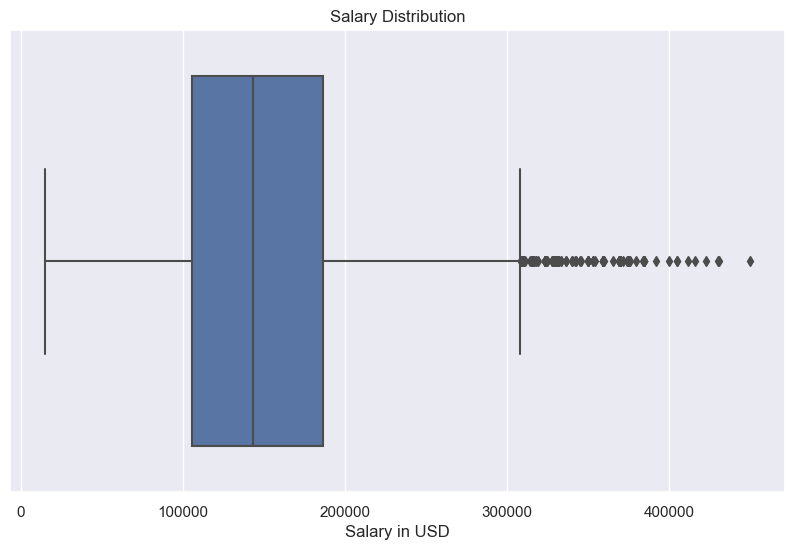

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=jobs_in_data['salary_in_usd'])

plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.show()

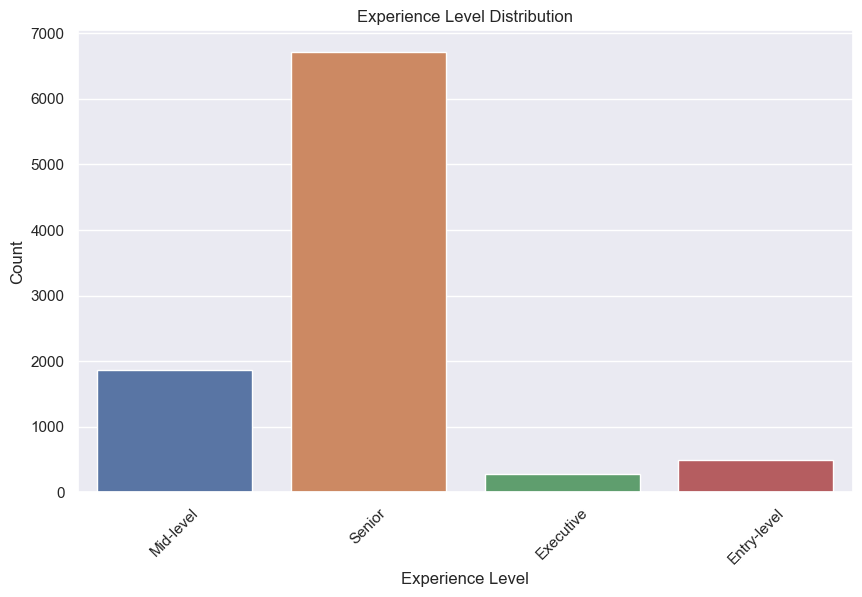

In [47]:
#experience_level 
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', data=jobs_in_data)

plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [53]:
import pandas as pd

# Columns to one-hot encode
columns_to_encode = ['job_category', 'experience_level', 'work_setting', 'employment_type', 'company_size','company_location']

# Apply one-hot encoding
jobs_in_data_encoded = pd.get_dummies(jobs_in_data, columns=columns_to_encode)

columns_to_drop = ['work_year', 'salary', 'salary_currency', 'job_title','employee_residence','job_title_numeric','job_title_category']
columns_to_drop = [col for col in columns_to_drop if col in jobs_in_data_encoded.columns]

# Drop the specified columns
jobs_in_data_encoded.drop(columns=columns_to_drop, inplace=True)

# Filter out only the rows where the company location contains 'US'
#us_jobs_encoded = jobs_in_data_encoded[jobs_in_data_encoded['company_location'].str.contains('US', case=False)]

# Calculate correlation matrix
correlation_matrix =jobs_in_data_encoded.corr()

correlation_matrix

,salary_in_usd,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,...,company_location_South Korea,company_location_Spain,company_location_Sweden,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States
salary_in_usd,1.000000,-0.044787,0.001721,-0.284148,0.015233,-0.036645,-0.060478,-0.060160,0.146882,-0.018201,...,-0.023911,-0.165179,-0.014603,-0.017805,-0.022144,-0.046849,-0.011616,-0.014260,-0.162969,0.320795
job_category_BI and Visualization,-0.044787,1.000000,-0.004302,-0.079912,-0.031395,-0.105007,-0.015073,-0.014308,-0.128272,-0.044351,...,-0.002721,-0.020573,-0.003332,-0.004302,-0.001924,0.021416,-0.004713,-0.003332,-0.025091,0.028070
job_category_Cloud and Database,0.001721,-0.004302,1.000000,-0.009932,-0.003902,-0.013051,-0.001873,-0.001778,-0.015943,-0.005512,...,-0.000338,-0.002557,-0.000414,-0.000535,-0.000239,-0.000535,-0.000586,-0.000414,-0.005192,0.008968
job_category_Data Analysis,-0.284148,-0.079912,-0.009932,1.000000,-0.072476,-0.242409,-0.034796,-0.033030,-0.296117,-0.102385,...,-0.006281,-0.001617,-0.007693,-0.009932,-0.004441,-0.009932,-0.010881,-0.007693,0.031816,-0.012700
job_category_Data Architecture and Modeling,0.015233,-0.031395,-0.003902,-0.072476,1.000000,-0.095236,-0.013671,-0.012977,-0.116337,-0.040224,...,-0.002468,-0.018659,-0.003022,-0.003902,-0.001745,-0.003902,-0.004275,-0.003022,0.007830,0.022921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
company_location_Turkey,-0.046849,0.021416,-0.000535,-0.009932,-0.003902,-0.002246,-0.001873,-0.001778,0.003851,-0.005512,...,-0.000338,-0.002557,-0.000414,-0.000535,-0.000239,1.000000,-0.000586,-0.000414,-0.005192,-0.059630
company_location_Ukraine,-0.011616,-0.004713,-0.000586,-0.010881,-0.004275,-0.014298,-0.002052,-0.001948,-0.017466,-0.006039,...,-0.000370,-0.002801,-0.000454,-0.000586,-0.000262,-0.000586,1.000000,-0.000454,-0.005688,-0.065325
company_location_United Arab Emirates,-0.014260,-0.003332,-0.000414,-0.007693,-0.003022,-0.010108,-0.001451,-0.001377,0.000427,-0.004269,...,-0.000262,-0.001980,-0.000321,-0.000414,-0.000185,-0.000414,-0.000454,1.000000,-0.004022,-0.046184
company_location_United Kingdom,-0.162969,-0.025091,-0.005192,0.031816,0.007830,0.019311,-0.018191,0.008898,-0.039229,0.030724,...,-0.003283,-0.024828,-0.004022,-0.005192,-0.002322,-0.005192,-0.005688,-0.004022,1.000000,-0.578985


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Columns to one-hot encode // a technique used in machine learning to represent categorical data as binary vectors
columns_to_encode = ['job_category', 'experience_level', 'work_setting', 'employment_type', 'company_size']

# Apply one-hot encoding
jobs_in_data_encoded = pd.get_dummies(jobs_in_data, columns=columns_to_encode)

columns_to_drop = ['work_year', 'salary', 'salary_currency', 'job_title','employee_residence','job_title_numeric','job_title_category','company_location']
columns_to_drop = [col for col in columns_to_drop if col in jobs_in_data_encoded.columns]

# Drop the specified columns
jobs_in_data_encoded.drop(columns=columns_to_drop, inplace=True)


jobs_in_data_encoded.corr()


,salary_in_usd,job_category_BI and Visualization,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,...,work_setting_Hybrid,work_setting_In-person,work_setting_Remote,employment_type_Contract,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,company_size_L,company_size_M,company_size_S
salary_in_usd,1.000000,-0.044787,0.001721,-0.284148,0.015233,-0.036645,-0.060478,-0.060160,0.146882,-0.018201,...,-0.140286,0.103978,-0.063933,-0.023701,-0.052373,0.075271,-0.058636,-0.042942,0.093605,-0.124171
job_category_BI and Visualization,-0.044787,1.000000,-0.004302,-0.079912,-0.031395,-0.105007,-0.015073,-0.014308,-0.128272,-0.044351,...,-0.022657,0.041833,-0.035634,-0.008393,-0.006384,0.012935,-0.007456,0.118288,-0.099749,-0.019866
job_category_Cloud and Database,0.001721,-0.004302,1.000000,-0.009932,-0.003902,-0.013051,-0.001873,-0.001778,-0.015943,-0.005512,...,-0.003339,-0.029074,0.030365,-0.001043,-0.000793,0.001608,-0.000927,0.010235,-0.008053,-0.003041
job_category_Data Analysis,-0.284148,-0.079912,-0.009932,1.000000,-0.072476,-0.242409,-0.034796,-0.033030,-0.296117,-0.102385,...,-0.001558,-0.059555,0.060651,0.026459,-0.006135,-0.025527,0.019626,-0.045103,0.039115,0.005101
job_category_Data Architecture and Modeling,0.015233,-0.031395,-0.003902,-0.072476,1.000000,-0.095236,-0.013671,-0.012977,-0.116337,-0.040224,...,-0.015147,-0.046324,0.051265,-0.007612,-0.005790,0.011732,-0.006762,-0.016116,0.024465,-0.022188
job_category_Data Engineering,-0.036645,-0.105007,-0.013051,-0.242409,-0.095236,1.000000,-0.045724,-0.043403,-0.389109,-0.134537,...,-0.026739,0.011141,-0.003416,-0.019914,-0.004791,0.021191,-0.010135,-0.062337,0.075211,-0.041368
job_category_Data Management and Strategy,-0.060478,-0.015073,-0.001873,-0.034796,-0.013671,-0.045724,1.000000,-0.006230,-0.055854,-0.019312,...,-0.011696,-0.000989,0.004432,-0.003655,-0.002780,0.005632,-0.003247,0.000600,0.004103,-0.010653
job_category_Data Quality and Operations,-0.060160,-0.014308,-0.001778,-0.033030,-0.012977,-0.043403,-0.006230,1.000000,-0.053019,-0.018332,...,-0.001215,0.000896,-0.000549,-0.003469,-0.002639,0.005347,-0.003082,-0.017516,0.020473,-0.010112
job_category_Data Science and Research,0.146882,-0.128272,-0.015943,-0.296117,-0.116337,-0.389109,-0.055854,-0.053019,1.000000,-0.164345,...,0.029864,0.011224,-0.020107,-0.020940,-0.010306,0.018177,0.000956,0.086031,-0.077137,-0.003941
job_category_Leadership and Management,-0.018201,-0.044351,-0.005512,-0.102385,-0.040224,-0.134537,-0.019312,-0.018332,-0.164345,1.000000,...,-0.021010,0.014503,-0.008494,-0.010754,0.005650,0.009723,-0.009553,-0.035327,0.038067,-0.013013


In [50]:

# Display the resulting DataFrame
print(jobs_in_data_encoded)

      salary_in_usd  job_category_BI and Visualization  \
0             95012                                  0   
1            186000                                  0   
2             81800                                  0   
3            212000                                  0   
4             93300                                  0   
...             ...                                ...   
9350         165000                                  0   
9351         412000                                  0   
9352         151000                                  0   
9353         105000                                  0   
9354         100000                                  0   

      job_category_Cloud and Database  job_category_Data Analysis  \
0                                   0                           0   
1                                   0                           0   
2                                   0                           0   
3                          

Mean Squared Error: 3123600320.9994655
R-squared: 0.24680567232898676


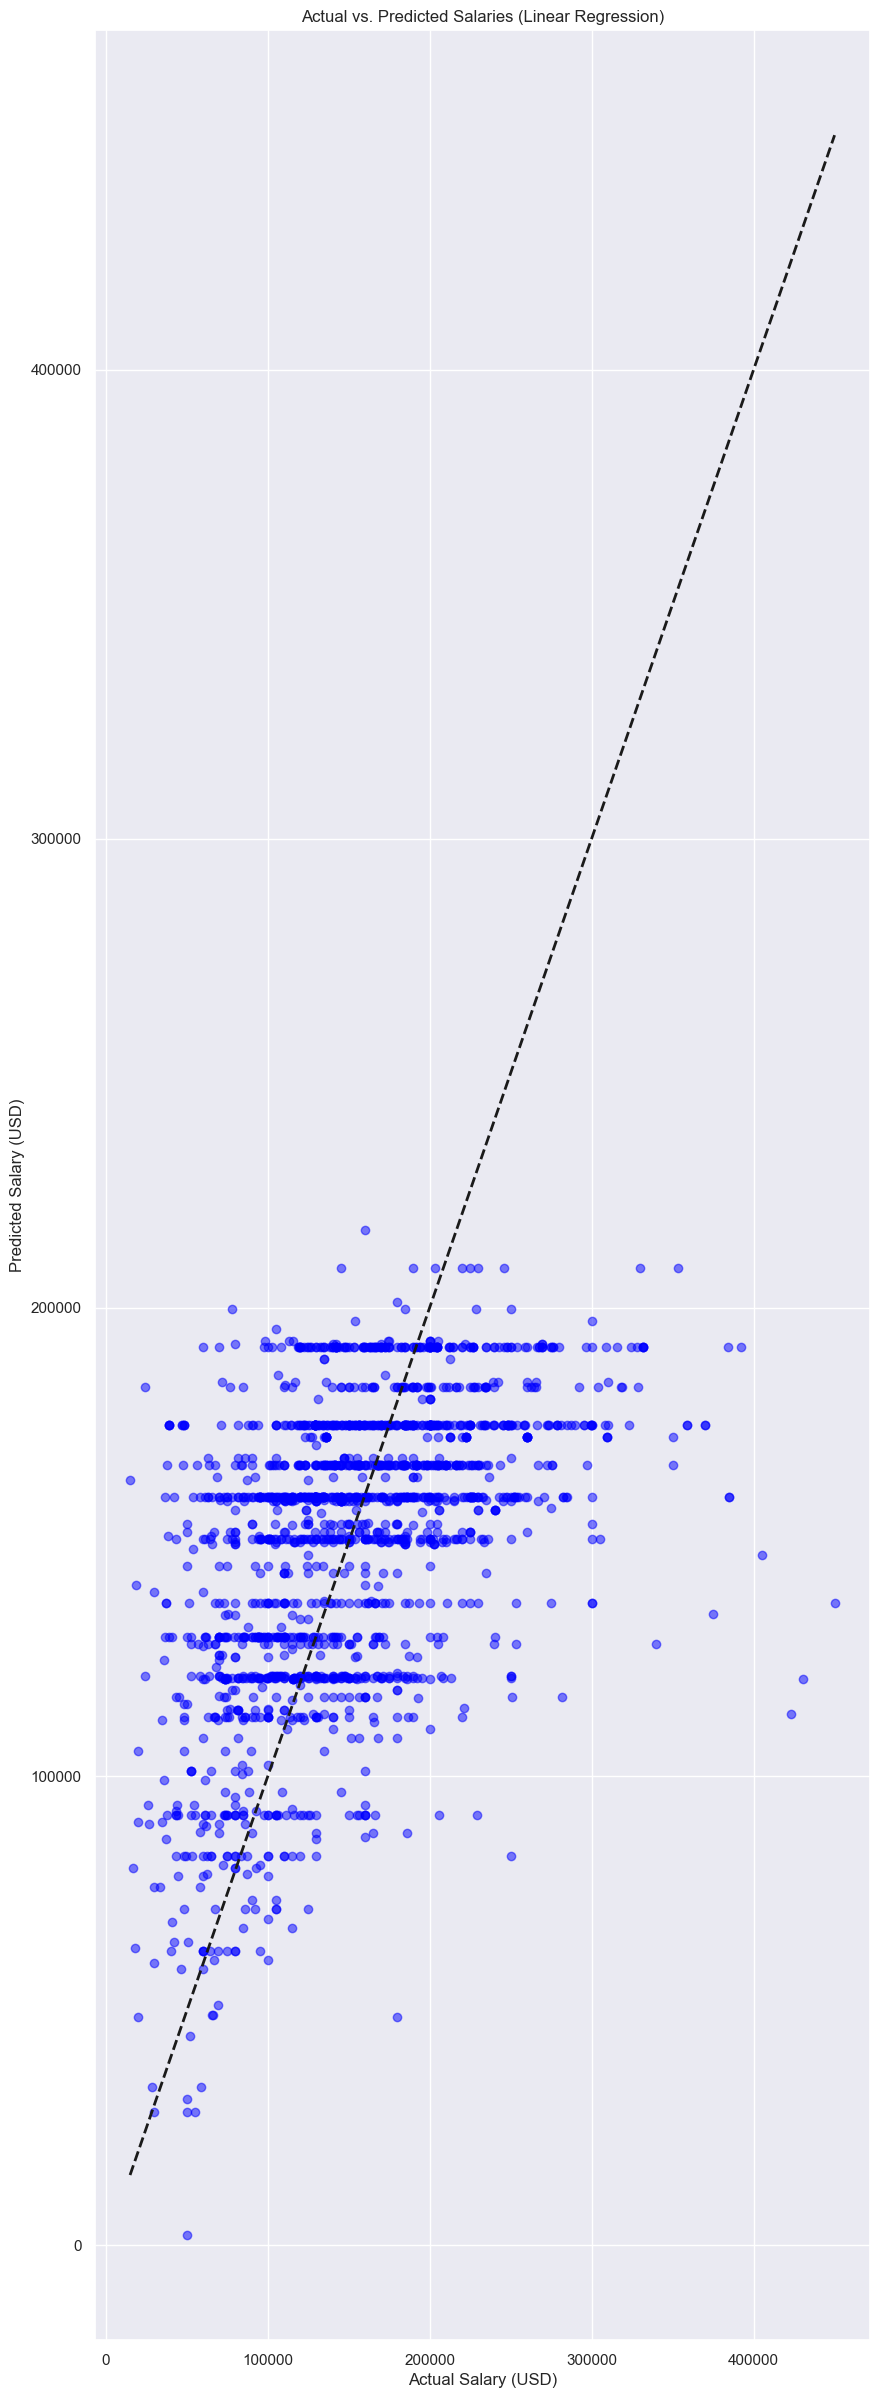

In [55]:
#linear regression model features:work_setting,employment type, company size,experience level.  target variable:salary in usd

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Exclude 'salary_in_usd' from features
features = jobs_in_data_encoded.drop(columns=['salary_in_usd'])

# X represents the features and 'salary_in_usd' is the target variable
X = features.values
y = jobs_in_data_encoded['salary_in_usd'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the model
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries (Linear Regression)')
plt.grid(True)
plt.show()

Mean Squared Error: 3137630268.239675
R-squared: 0.24342262853564123


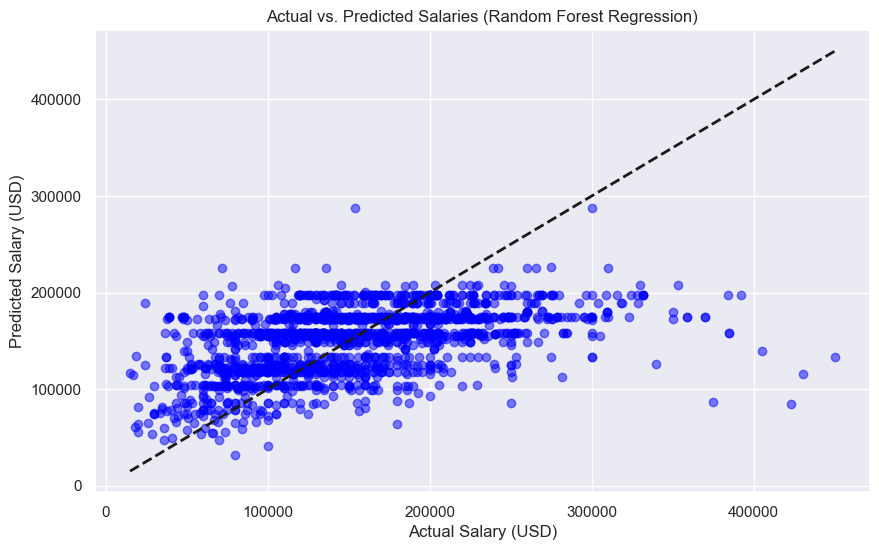

In [56]:
#Random Forest Regression model features:work_setting,employment type, company size,experience level.  target variable:salary in usd


# Split the data into features (X) and target variable (y)
X = jobs_in_data_encoded.drop(['salary_in_usd'], axis=1)
y = jobs_in_data_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries (Random Forest Regression)')
plt.grid(True)
plt.show()



Mean Squared Error: 3102092173.7375736
R-squared: 0.2519919358875672


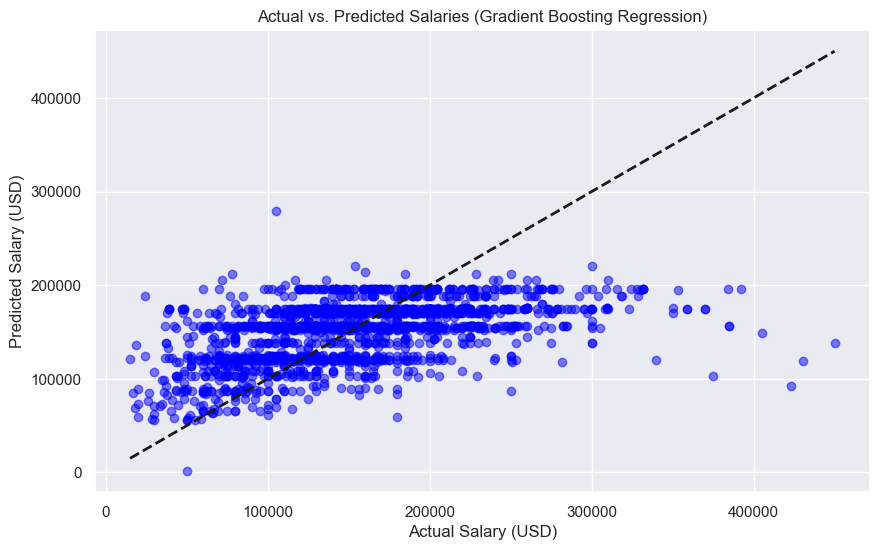

In [57]:
#a Gradient Boosting Regression model features:work_setting,employment type, company size,experience level.  target variable:salary in usd


#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features (X) and target variable (y)
X = jobs_in_data_encoded.drop(['salary_in_usd'], axis=1)
y = jobs_in_data_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries (Gradient Boosting Regression)')
plt.grid(True)
plt.show()



Gradient Boosting Regression:
Mean Squared Error: 3102092173.7375736
R-squared: 0.2519919358875672



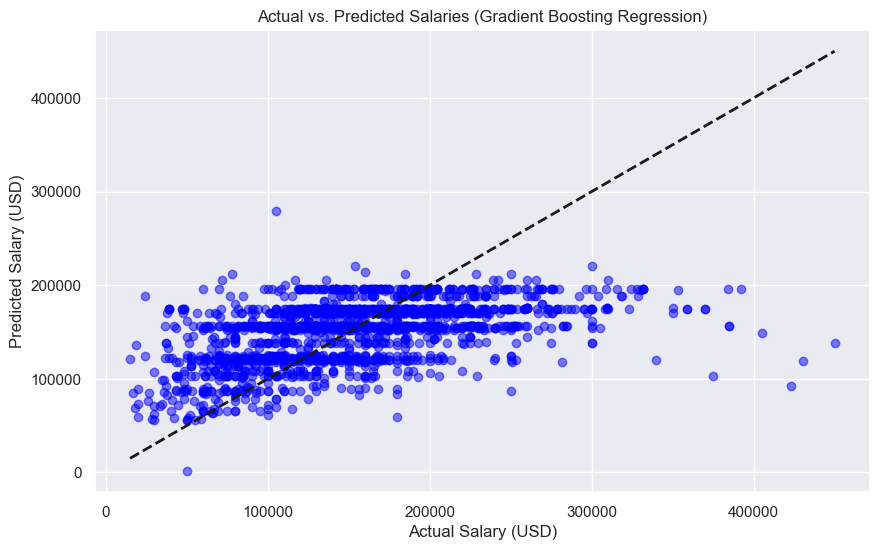

Lasso Regression:
Mean Squared Error: 3121937995.177821
R-squared: 0.24720650926423304

Ridge Regression:
Mean Squared Error: 3116266564.650474
R-squared: 0.24857406236449997


/Users/melvinlewis/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.776e+12, tolerance: 2.957e+09
  model = cd_fast.enet_coordinate_descent(


In [58]:
#gradient boosting regression / lasso / ridge model : features:work_setting,employment type, company size,experience level.  target variable:salary in usd


# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = jobs_in_data_encoded.drop(['salary_in_usd'], axis=1)
y = jobs_in_data_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set using Gradient Boosting Regression
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate the Gradient Boosting Regression model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics for Gradient Boosting Regression
print("Gradient Boosting Regression:")
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')
print()

# Plot the actual vs. predicted salaries for Gradient Boosting Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries (Gradient Boosting Regression)')
plt.grid(True)
plt.show()

# Lasso Regression
lasso_regressor = Lasso(alpha=0.5)  # You can adjust the alpha parameter as needed
lasso_regressor.fit(X_train, y_train)
lasso_y_pred = lasso_regressor.predict(X_test)

# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

# Print evaluation metrics for Lasso Regression
print("Lasso Regression:")
print(f'Mean Squared Error: {lasso_mse}')
print(f'R-squared: {lasso_r2}')
print()

# Ridge Regression
ridge_regressor = Ridge(alpha=7.0)  # You can adjust the alpha parameter as needed
ridge_regressor.fit(X_train, y_train)
ridge_y_pred = ridge_regressor.predict(X_test)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Print evaluation metrics for Ridge Regression
print("Ridge Regression:")
print(f'Mean Squared Error: {ridge_mse}')
print(f'R-squared: {ridge_r2}')


Mean Squared Error: 3444344833.203506
R-squared: 0.16946448831143945


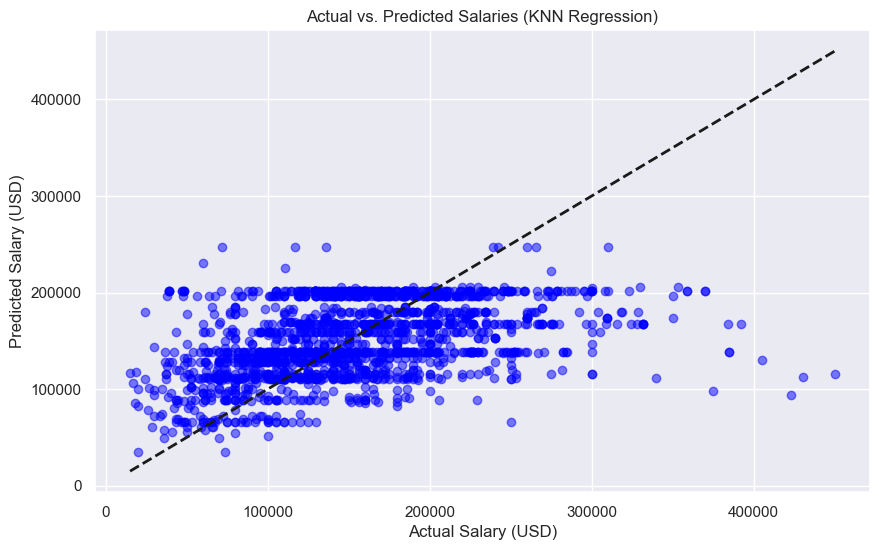

In [59]:
#KNN features:work_setting,employment type, company size,experience level.  target variable:salary in usd


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = jobs_in_data_encoded.drop(['salary_in_usd'], axis=1)
y = jobs_in_data_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the actual vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries (KNN Regression)')
plt.grid(True)
plt.show()


Mean Squared Error: 3776238181.36241
R-squared: 0.0894349834018483


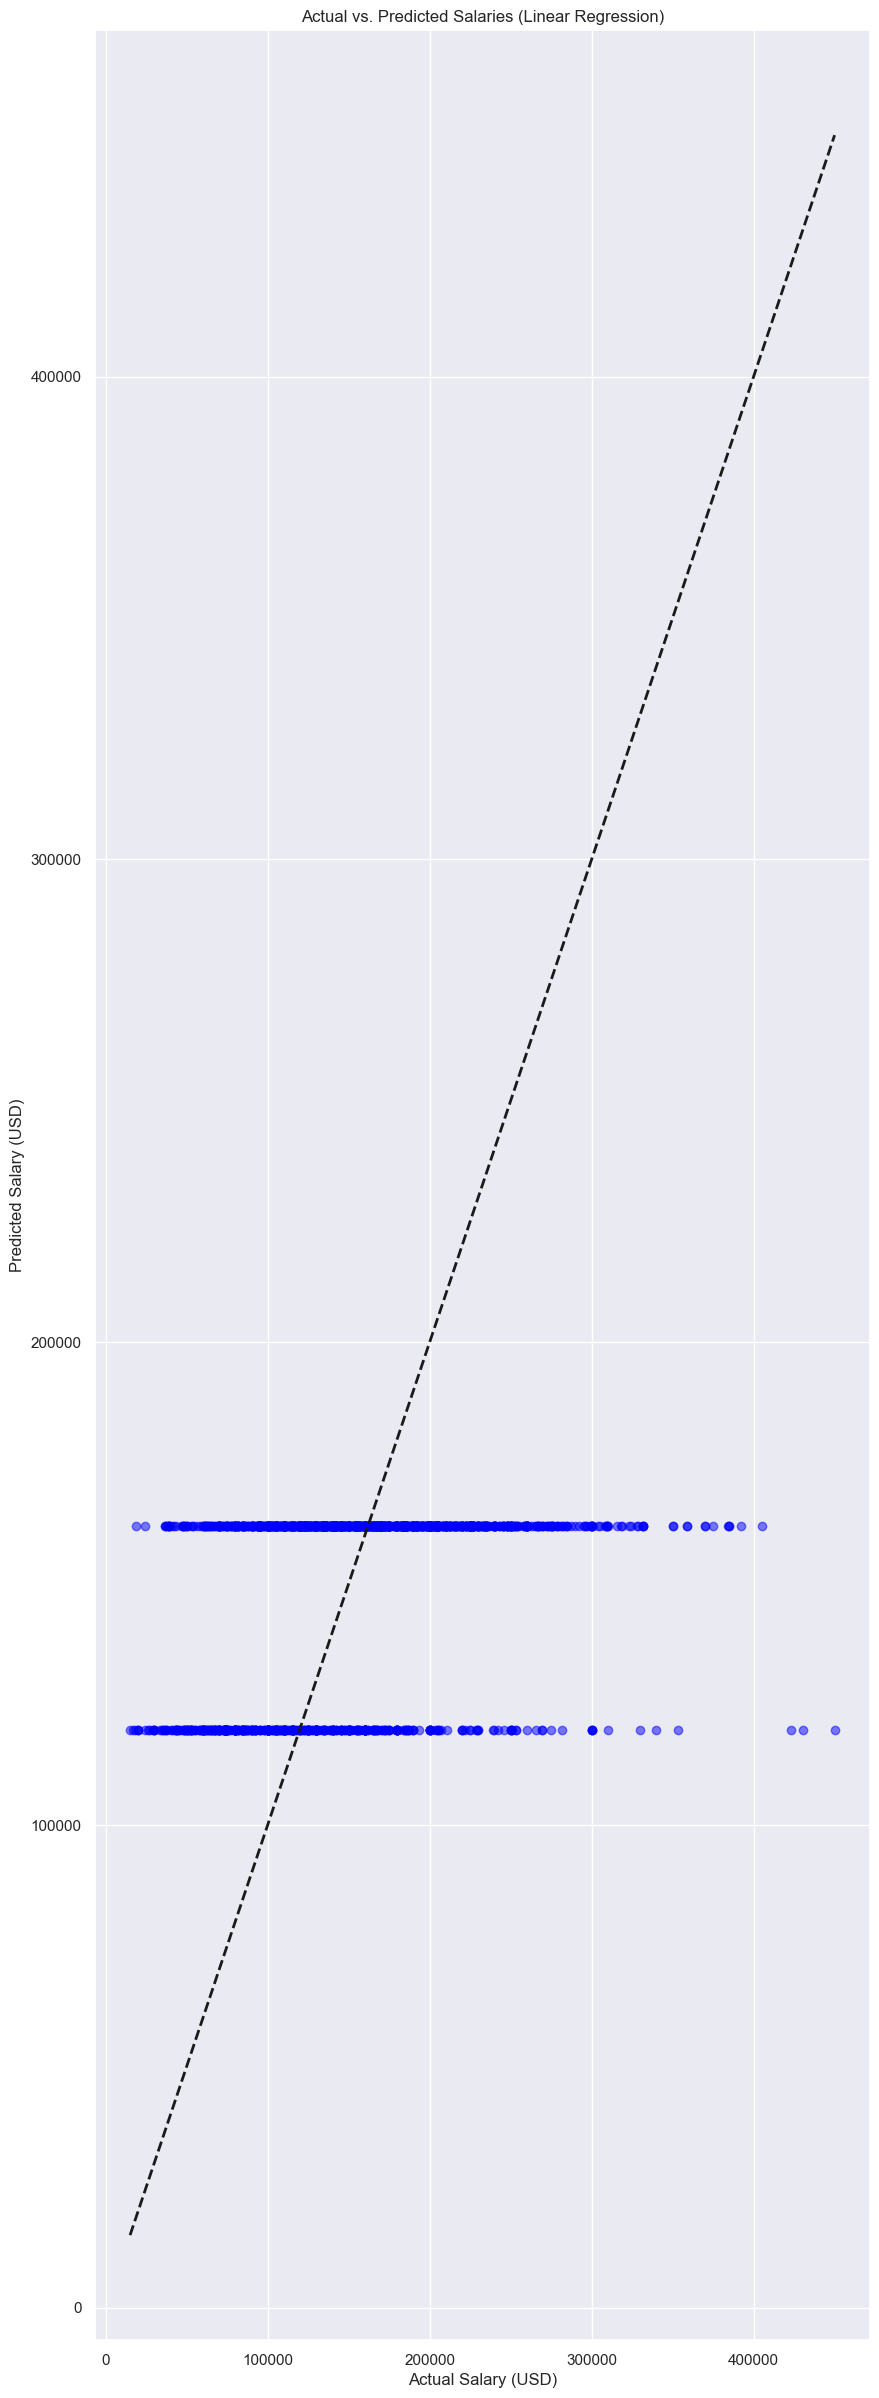

In [60]:
#linear regression model features:experience level.  target variable:salary in usd

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# X represents the features and 'salary_in_usd' is the target variable
X = jobs_in_data_encoded['experience_level_Senior'].values
y = jobs_in_data_encoded['salary_in_usd'].values


X = X.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the model
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries (Linear Regression)')
plt.grid(True)
plt.show()

Mean Squared Error: 3775956216.7357225
R-squared: 0.08950297358484227


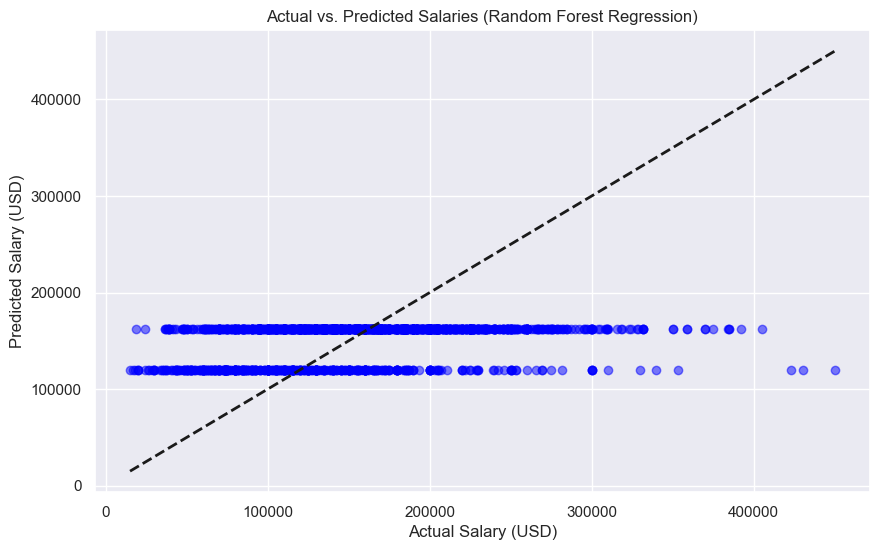

In [27]:
#Random Forest Regression model features:experience level.  target variable:salary in usd

#Split the data into features (X) and target variable (y)
X = jobs_in_data_encoded['experience_level_Senior'].values
y = jobs_in_data_encoded['salary_in_usd']

X = X.reshape(-1, 1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

#Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#Plot the actual vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries (Random Forest Regression)')
plt.grid(True)
plt.show()


Mean Squared Error: 3776238787.1650996
R-squared: 0.08943483732453283


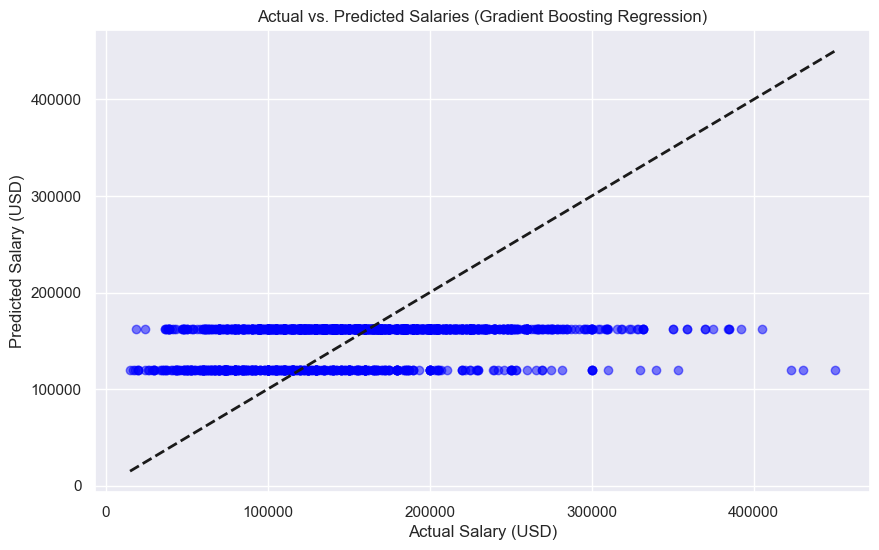

In [28]:
#a Gradient Boosting Regression model features:experience level.  target variable:salary in usd


#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


#Split the data into features (X) and target variable (y)
X = jobs_in_data_encoded['experience_level_Senior'].values
y = jobs_in_data_encoded['salary_in_usd']

X = X.reshape(-1, 1)


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train a Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

#Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#Plot the actual vs. predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs. Predicted Salaries (Gradient Boosting Regression)')
plt.grid(True)
plt.show()

